In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

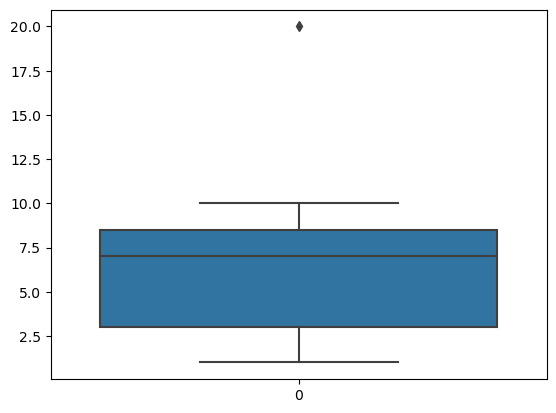

In [2]:
data = [1,2,3,3,5,7,7,8,9,10,20]
sns.boxplot(data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f37dfff9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f37dffff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f37dfff700>],
 'medians': [<matplotlib.lines.Line2D at 0x1f37e00c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f37e00c820>],
 'means': []}

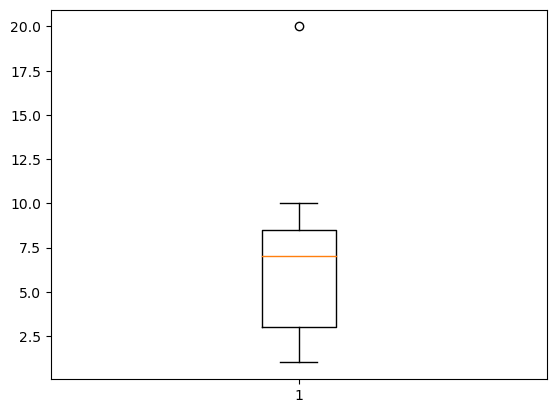

In [4]:
fig, ax = plt.subplots()
ax.boxplot(data)

In [6]:
df = pd.read_csv('weight-height.csv')

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df1 = df.copy()

In [11]:
Q1 = df['Height'].quantile(.25)

In [12]:
Q1

63.95768391

In [13]:
Q3 = df['Height'].quantile(.75)
Q3

69.60442710999999

In [14]:
IQR = Q3 - Q1
IQR

5.646743199999989

In [15]:
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

In [16]:
len(df['Height'])

8555

In [17]:
df_clean_data = df[(df['Height'] >= lower_fence) & (df['Height'] <= upper_fence)]
df_clean_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [18]:
len(df_clean_data)

8545

<AxesSubplot:>

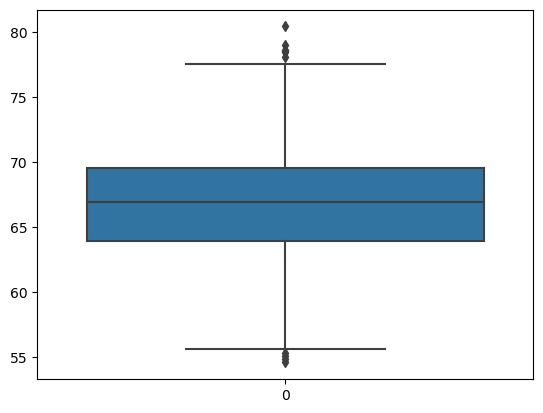

In [19]:
sns.boxplot(data=df['Height'])

<AxesSubplot:>

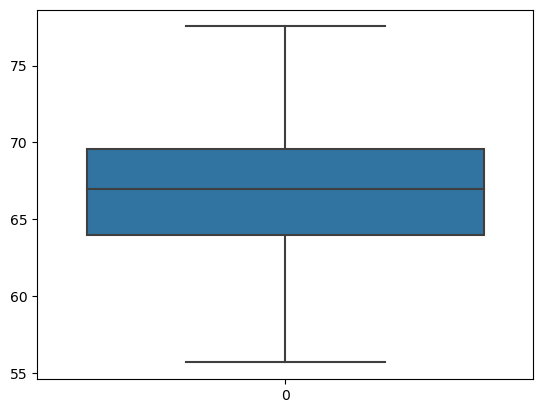

In [20]:
sns.boxplot(data=df_clean_data['Height'])

In [21]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
len(df)

8555

<AxesSubplot:xlabel='Weight', ylabel='Count'>

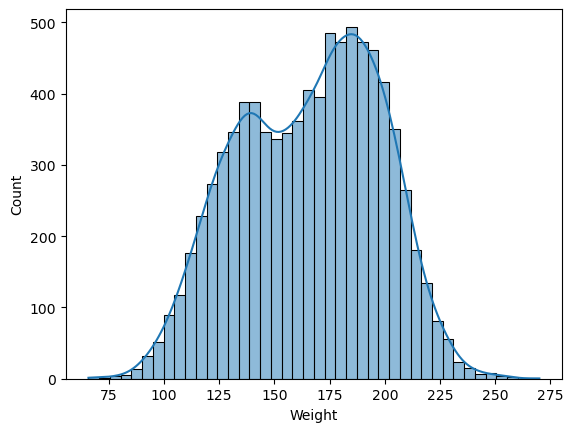

In [25]:
sns.histplot(df['Weight'], kde=True)

In [26]:
#remove out

In [27]:
lower_fence

55.48756911000002

In [29]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [30]:
mean_wt = df['Weight'].mean()
std_wt = df['Weight'].std()
std_neg_3 = mean_wt - (3*std_wt)
std_pos_3 = mean_wt + (3*std_wt)

In [31]:
df[df.Weight < std_neg_3]

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [32]:
df[df.Weight > std_pos_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [33]:
remove_out = df[(df.Weight < std_pos_3) & (df.Weight > std_neg_3)]
remove_out

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [34]:
len(df)

8555

# Z-Score

In [35]:
df1['zscore'] = (df1.Weight - df1.Weight.mean()) / (df1.Weight.std())
df1.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664


In [37]:
df1[df1.zscore > 3]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989698,3.256685


In [38]:
df1[df1.zscore < -3]

,Gender,Height,Weight,zscore
151,Male,65.350411,65.78000,-3.116121
160,Male,64.333648,68.64000,-3.026868
5360,Female,55.668202,68.98253,-3.016179
